# Waqar Ahmed (20P-0750)
# Muhammad Rafay (20P-0018)


Import Libraries and Load Data

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
file_path = 'Students Data - Updated File.xlsx'
students_data = pd.read_excel(file_path)


Create the Graph and Add Nodes

In [20]:
# Create the graph
G = nx.Graph()

# Add nodes (unique courses)
courses = set(students_data['cod'])
G.add_nodes_from(courses)


Add Edges Based on Shared Students

In [21]:
# Add edges between courses if shared by the same student
for roll_number, group in students_data.groupby('Roll_Number'):
    for i, course1 in enumerate(group['cod']):
        for course2 in group['cod'][i+1:]:
            if G.has_edge(course1, course2):
                G[course1][course2]['weight'] += 1
            else:
                G.add_edge(course1, course2, weight=1)


Enforce Course Pairs and Merge Nodes

In [22]:
# Set course pairs that must be scheduled together
course_pairs = [('CS4063', 'DS5007'), ('CS4055', 'CS6007'), ('CS5012', 'CS4068'), ('SS1008', 'SS2010'), ('SS1007', 'SS1002')]

# Enforcing the course pairs to share the same "color" or exam day by merging nodes
for course1, course2 in course_pairs:
    combined_node = course1 + " & " + course2
    G = nx.contracted_nodes(G, course1, course2, self_loops=False)
    G = nx.relabel_nodes(G, {course1: combined_node})


Color the Graph to Determine Exam Schedule

In [23]:
# Strategies for graph coloring
strategies = ['largest_first', 'random_sequential', 'smallest_last', 'independent_set', 'connected_sequential_bfs', 'connected_sequential_dfs', 'saturation_largest_first']

# Attempt to reduce the chromatic number to 12 or fewer using different strategies
def attempt_color_reduction(graph, max_colors=12):
    for strategy in strategies:
        coloring = nx.greedy_color(graph, strategy=strategy)
        if max(coloring.values()) + 1 <= max_colors:
            return coloring, strategy
    return None, None

coloring, strategy_used = attempt_color_reduction(G, max_colors=12)
num_colors = max(coloring.values()) + 1 if coloring else min([max(nx.greedy_color(G, strategy=strategy).values()) + 1 for strategy in strategies])


Visualize the Graph

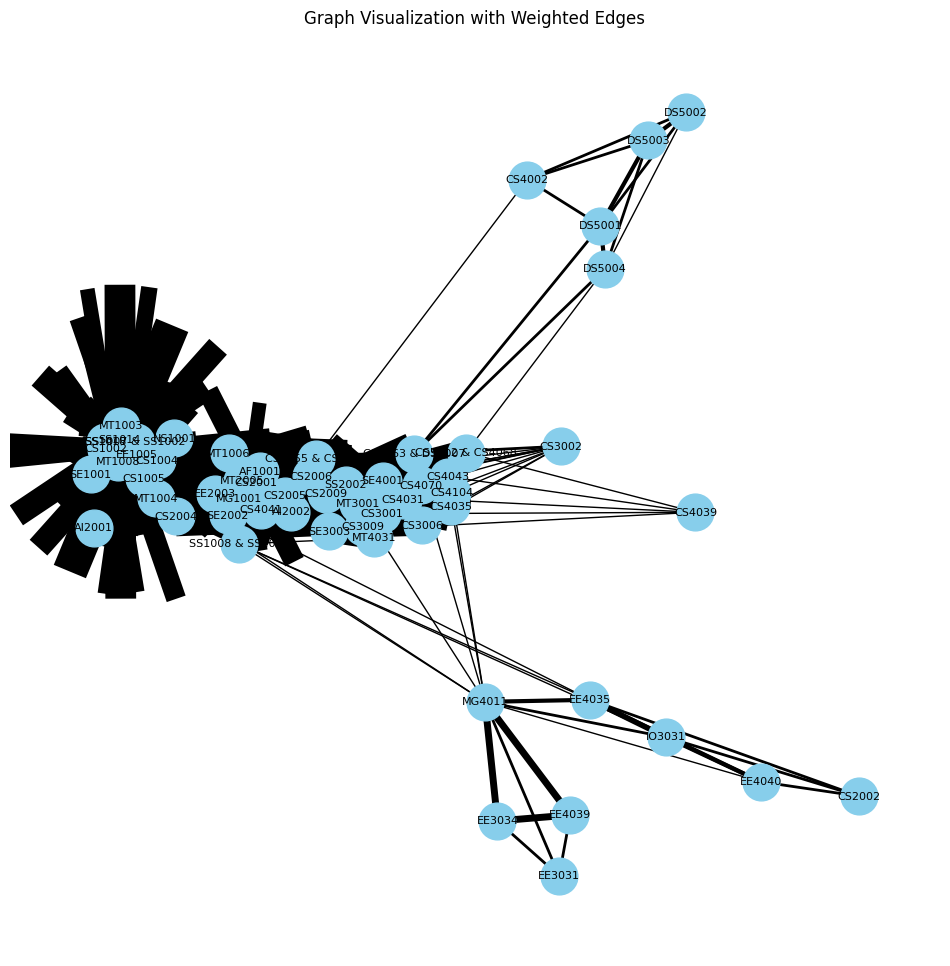

In [24]:
# Graph visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # positions for all nodes
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=[v for v in weights.values()])
plt.title("Graph Visualization with Weighted Edges")
plt.axis('off')
plt.show()


Output Results

In [25]:
# Output results
print(f"Total number of nodes: {G.number_of_nodes()}")
print(f"Total number of edges: {G.number_of_edges()}")
print(f"Chromatic number: {num_colors}")
print(f"Coloring strategy used: {strategy_used if strategy_used else 'best found'}")


Total number of nodes: 58
Total number of edges: 510
Chromatic number: 13
Coloring strategy used: best found
